# Wine
Nel progetto, abbiamo costruito un modello di classificazione per prevedere il produttore di vino tra tre produttori diversi, basandoci sulle caratteristiche chimiche del vino.<br><br>
Prima di costruire il modello, abbiamo effettuato un'analisi dei dati per comprendere le caratteristiche del dataset. In particolare, abbiamo visualizzato le distribuzioni delle feature e le correlazioni tra di esse.<br>
Il modello di classificazione scelto è il RandomForestClassifier e per ottimizzarne le prestazioni, abbiamo eseguito il tuning degli iperparametri tramite la tecnica di GridSearchCV.<br><br>

Grazie all'implementazione di questo modello di classificazione, siamo stati in grado di ottenere previsioni accurate per ciascuna variante nel dataset.

## Table of Contents  
1. [Librerie](#1)      
1. [Caricamento Data](#2) 
1. [Data Analysis & Visualization](#3)      
    1. [Split in Training Set e Test Set e Bilanciamento](#3A) 
    4. [Standardizzazione](#3D)
    5. [Matrice di Correlazione](#3E)  
1. [Modello](#4)              
1. [Conclusione](#5)  

## Librerie<a class="anchor" id="1"></a>

In [1]:
# Importo librerie
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier

## Caricamento Data<a class="anchor" id="2"></a>

In [2]:
# Carico dataset wine
data = datasets.load_wine()
X = data['data']
y = data['target']

In [3]:
print(X.shape, y.shape)

(178, 13) (178,)


In [4]:
# Creo dataframe pandas
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Data Analysis & Visualization<a class="anchor" id="3"></a>

In [5]:
# Controlla valori mancanti e il tipo di dato per features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
# Informazioni statistiche sulle features numeriche
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

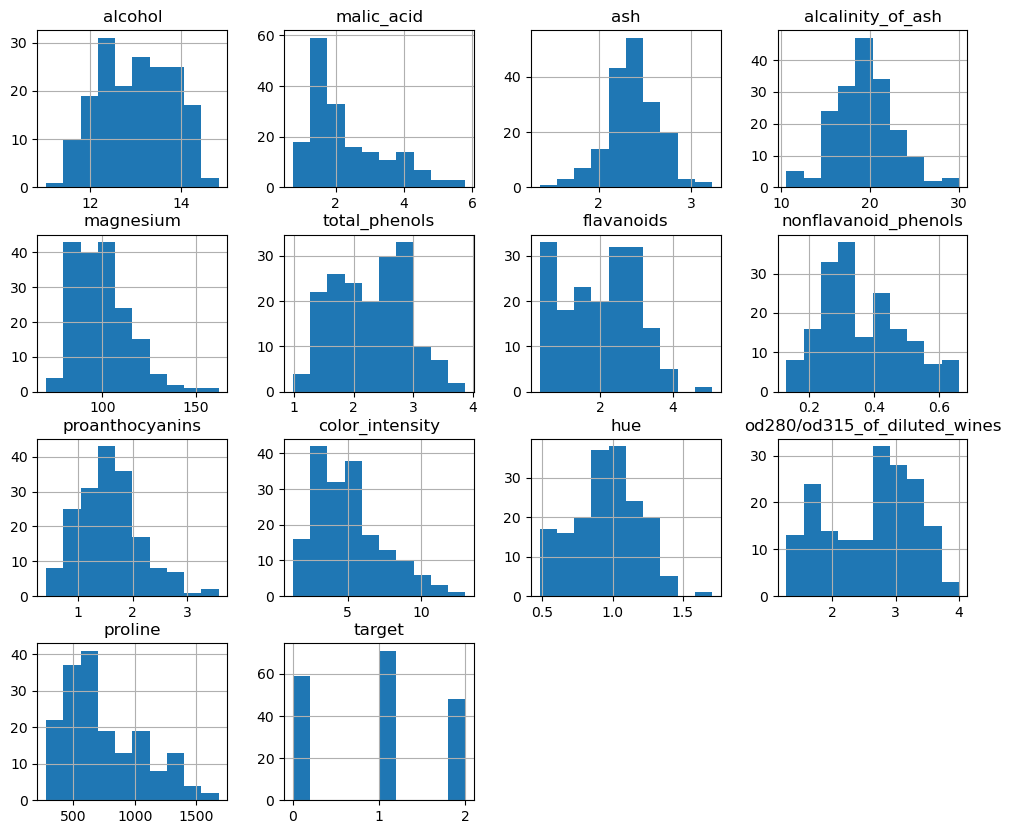

In [8]:
df.hist(figsize=(12,10))

Dall'analisi del dataset notiamo come tutte le features siano di tipo numerico, non sono presenti valori mancanti e nessuna delle features segue una distribuzione normale.

### Split in Training Set e Test Set e Bilanciamento<a class="anchor" id="3A"></a>

In [9]:
# Verifico se il dataset è sbilanciato
freq_target = df['target'].value_counts()
freq_target

1    71
0    59
2    48
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

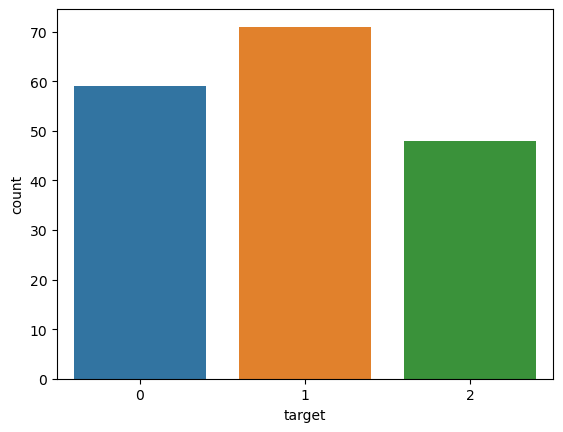

In [10]:
sns.countplot(x=df['target'])

In [11]:
# Suddivido il set in training set e test set in percentuale 80% 20%, avviene anche il mescolamento dei dati
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [12]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (119, 13)
y_train: (119,)
X_test: (59, 13)
y_test: (59,)


Il dataset presenta uno **sbilanciamento** tra le etichette di classe, il che può compromettere l'efficacia del modello, soprattutto se si utilizza un campionamento casuale (random sampling). Per ovviare a questo problema, conviene utilizzare uno **stratified sampling** che consideri la distribuzione delle etichette di classe.

### Standardizzazione<a class="anchor" id="3D"></a>

In [13]:
# Standardizzazione dei dati
scaler = StandardScaler()
X_train_stan = scaler.fit_transform(X_train)
X_test_stan = scaler.transform(X_test)

### Matrice di Correlazione<a class="anchor" id="3E"></a>

<Axes: >

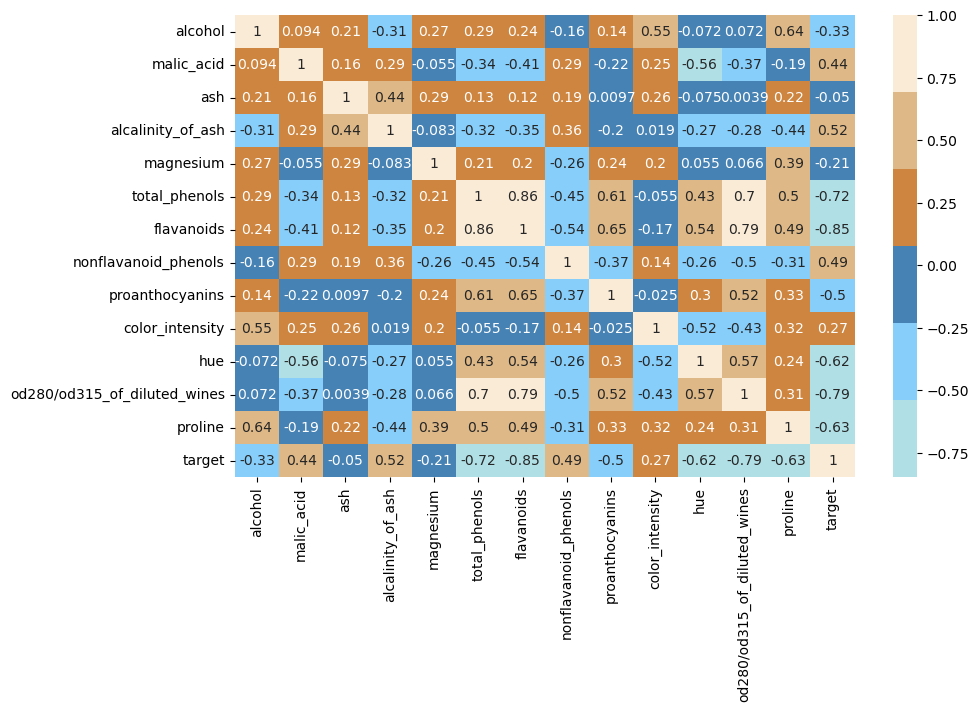

In [14]:
corr_matrix = df.corr()

cols = (["#B0E0E6", "#87CEFA", "#4682B4", "#CD853F", "#DEB887", "#FAEBD7"])
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix, cmap=cols ,annot=True)

In [15]:
corr_matrix["target"].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64

In [16]:
# Seleziono le features 
features = ['od280/od315_of_diluted_wines', 'total_phenols', 'flavanoids', 'proline']
df_features = df[features].copy() 
df_features['target'] = df['target'].astype(str)

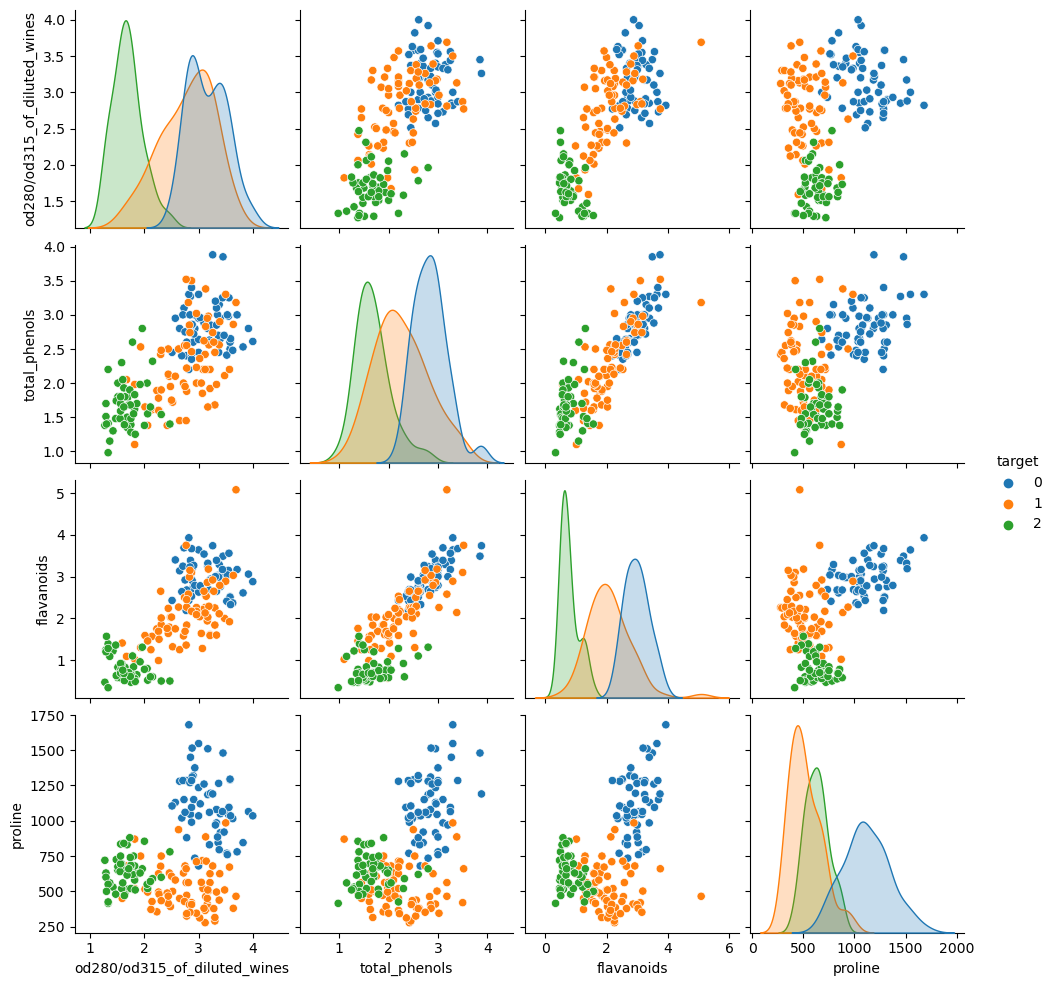

In [17]:
sns.pairplot(df_features, hue='target')

Dalla *matrice di correlazione* notiamo come vi sia una **elevata correlazione** tra le features e la variabile target.

# Modello<a class="anchor" id="4"></a>

In [18]:
# Creo modello randomforest
model = RandomForestClassifier(random_state=42)

In [19]:
# Fornisco valori per validazione iperparametri
n_estimators = [100, 300]
max_features = [1,2,3,4,5,6,7]
min_samples_split = [0.01, 0.05, 0.1]
min_samples_leaf = [0.01, 0.05, 0.1]

In [20]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [21]:
grid_rf = GridSearchCV(estimator = model, param_grid = param_grid, scoring='accuracy',cv=3)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [0.01, 0.05, 0.1],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [22]:
# Stampo i migliori parametri
print(grid_rf.best_params_)

{'max_features': 1, 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 100}


In [23]:
# Crea il modello con i migliori iperparametri
model = grid_rf.best_estimator_

In [24]:
pred = model.predict(X_test)

In [25]:
print(accuracy_score(y_test, pred))

0.9830508474576272


In [26]:
cm = confusion_matrix(y_test,pred)

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

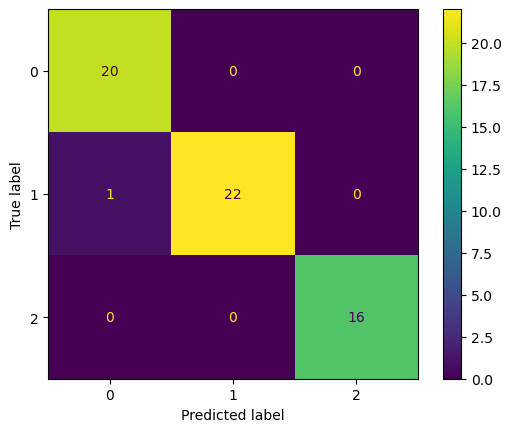

In [28]:
disp.plot()

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.96      0.98        23
           2       1.00      1.00      1.00        16

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



# Conclusione<a class="anchor" id="5"></a>
In conclusione, alla luce delle metriche di valutazione utilizzate per il progetto, il modello *RandomForestClassifier* fornisce una buona capacità predittiva per la classificazione dei dati del dataset wine di sklearn.